## Classification Decision Tree (ID3) - Play Tennis

### 1. Declarations library

In [15]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Statistical data visualization
from scipy import stats # Scientific computation library using Python

### 2. Data Acquisition

In [16]:
# load dataset
dataset = pd.read_csv("dataset/PlayTennis.csv")

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [20]:
print(dataset)

     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no


In [21]:
for col in dataset.columns:
    print("############# {} #############".format(col))
    print(dataset[col].value_counts())
    print('\n')

############# outlook #############
sunny       5
rainy       5
overcast    4
Name: outlook, dtype: int64


############# temp #############
mild    6
hot     4
cool    4
Name: temp, dtype: int64


############# humidity #############
high      7
normal    7
Name: humidity, dtype: int64


############# windy #############
False    8
True     6
Name: windy, dtype: int64


############# play #############
yes    9
no     5
Name: play, dtype: int64




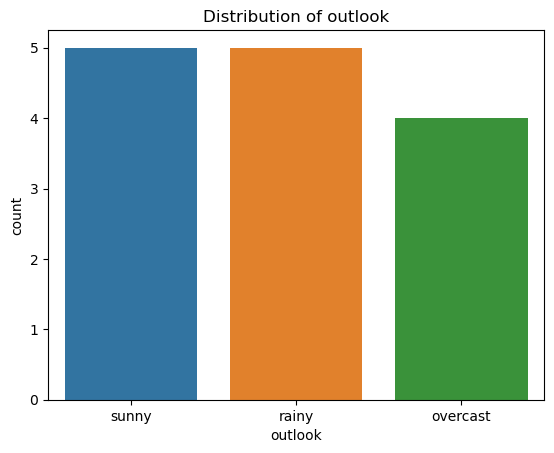

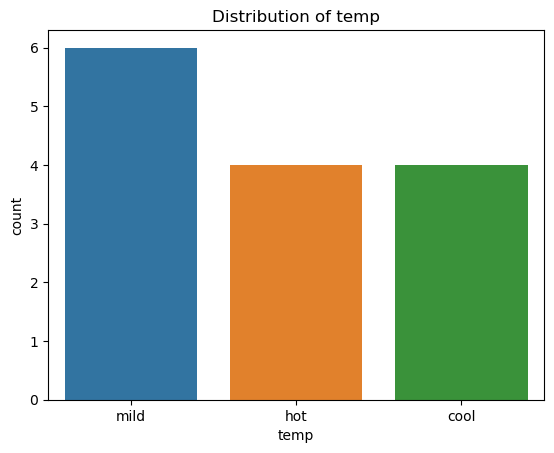

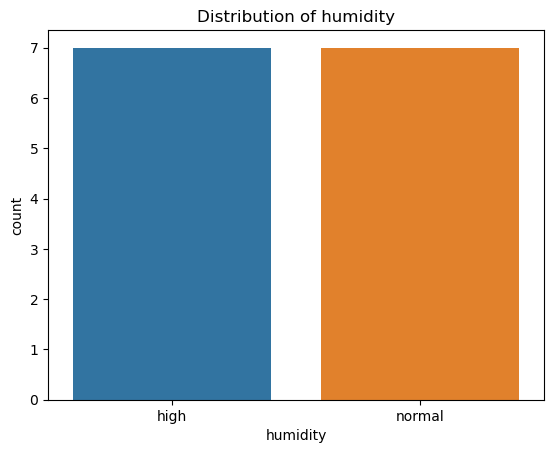

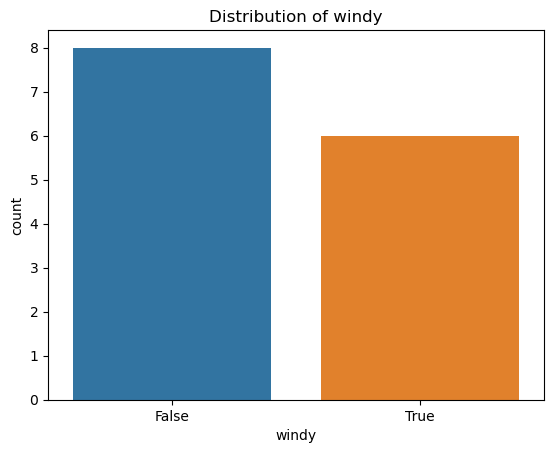

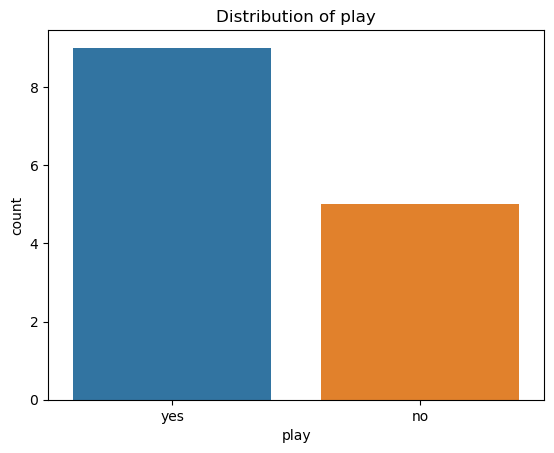

In [22]:
for col in dataset.columns:  
    sns.countplot(x = col, data = dataset, order = dataset[col].value_counts().index)
    plt.title('Distribution of {}'.format(col))
    plt.show()

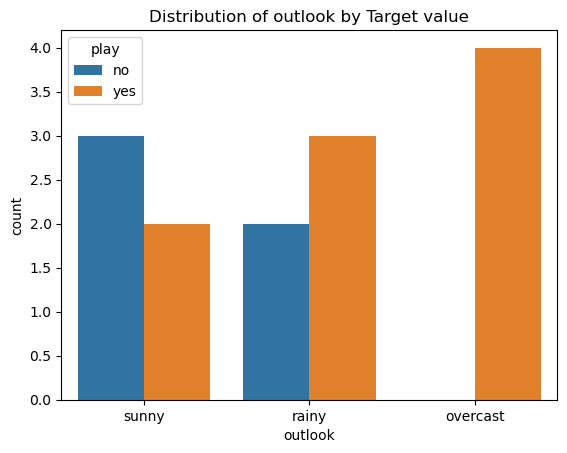

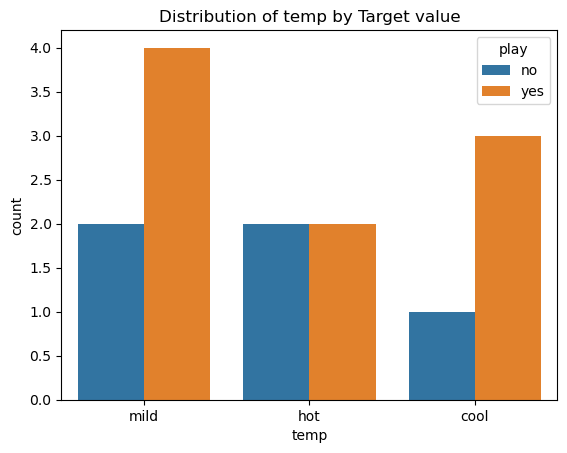

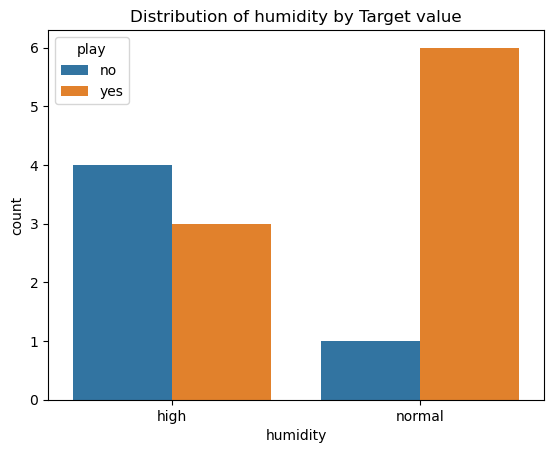

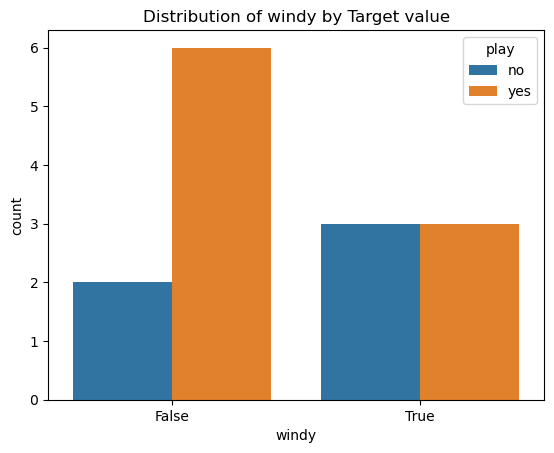

In [23]:
#Analysis on categorical data
for col in dataset.columns[:-1]:  
    sns.countplot(x = col, data = dataset, hue = 'play',
                  order = dataset[col].value_counts().index)
    plt.title('Distribution of {} by Target value'.format(col))
    plt.show()

### 3. Data Preprocessing

In [24]:
# set independent variable and dependent variable
x = dataset[["outlook", "temp", "humidity", "windy"]]
y = dataset["play"].values.reshape(-1, 1)

In [25]:
# set data train and data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

In [26]:
# view dimensionality data train
print(x_train.shape, y_train.shape)

(11, 4) (11, 1)


In [27]:
# view dimensionality data test
print(x_test.shape, y_test.shape)

(3, 4) (3, 1)


### 4. Modeling ID3